# Clasificación utilizando Modelos de Machine Learning

## Importación de Librerías

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sys
if 'helpers' in sys.modules:  
    del sys.modules['helpers']
from helpers import plot_evaluation_results, save_model_metrics, muestra_metricas

sns.set()

In [84]:
seed = 17

## Carga del *Dataset*

In [85]:
# Cargar dataset
df = pd.read_csv("../datasets/chicago_crimes_and_stations_2024_final.csv")
test_df = pd.read_csv("../datasets/chicago_crimes_and_stations_2024_final_test.csv")


X = df.drop(["Arrest_tag"], axis=1)
y = df["Arrest_tag"]

X_test = test_df.drop(["Arrest_tag"], axis=1)
y_test = test_df["Arrest_tag"]

In [86]:
# como siempre vamos separando nuestras variables predictoras de la variable a predecir
X_train = X
y_train = y

## Entrenamiento y Prueba de Modelos

### Modelo de Regresión Logística


In [87]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_logistic = LogisticRegression(random_state = seed)
model_logistic.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_logistic = model_logistic.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_logistic))
muestra_metricas("Regresión Logística", y_test, pred_logistic, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.67      0.77     43780
           1       0.23      0.63      0.34      6964

    accuracy                           0.66     50744
   macro avg       0.58      0.65      0.56     50744
weighted avg       0.82      0.66      0.72     50744

#######################################
Accuracy (Exactitud): 66.41%
Recall (Recuperación): 66.41%
Precision (Precisión): 82.48%
F1-Score: 71.50%
MCC (Matthews Correlation Coefficient): 21.27%
Tiempo de entrenamiento: 0.2298 s
Tiempo de predicción: 0.0012 s
Tiempo total: 0.2310 s
#######################################


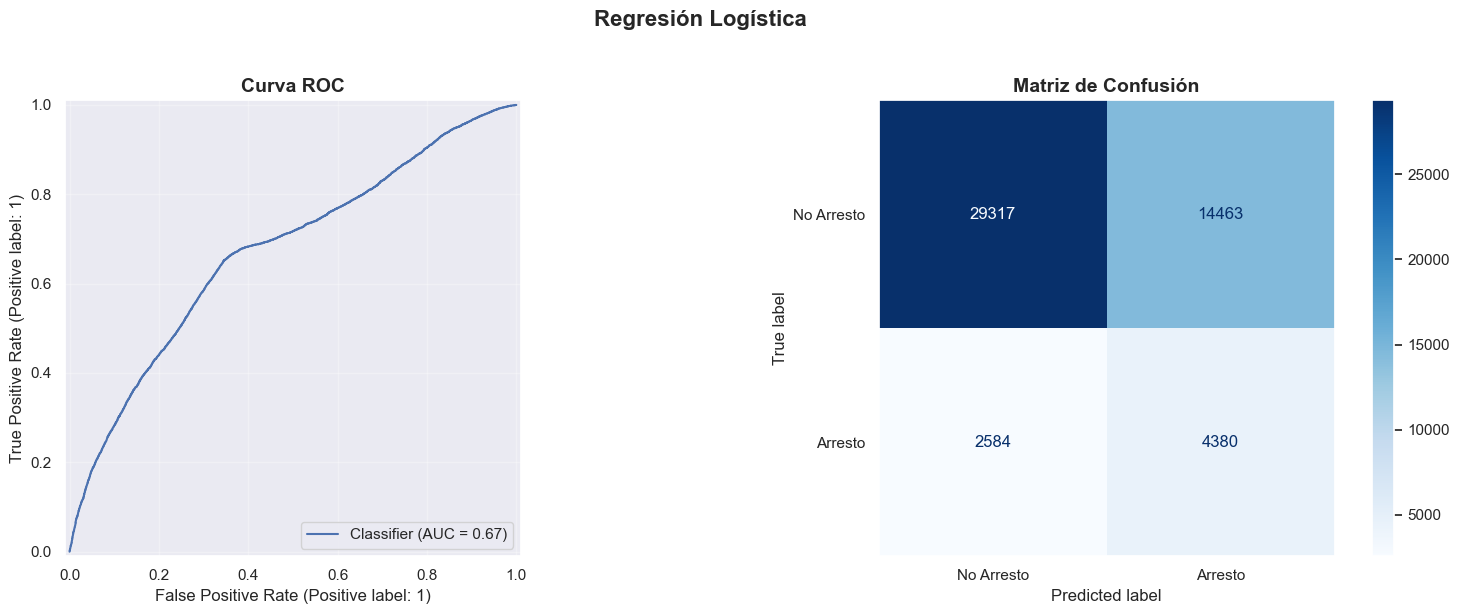

In [88]:
# Obtener probabilidades para ROC curve
pred_logistic_proba = model_logistic.predict_proba(X_test)[:, 1]

# Gráfica Matriz de Confusión y ROC
cm = plot_evaluation_results(y_test, pred_logistic, pred_logistic_proba, 
                              title="Regresión Logística",
                              labels=["No Arresto", "Arresto"])

In [89]:
metrics_logistic = {
    'model_name': 'Regresion Logistica',
    'Accuracy': float(accuracy_score(y_test, pred_logistic)),
    'Precision': float(precision_score(y_test, pred_logistic, average='weighted')),
    'Recall': float(recall_score(y_test, pred_logistic, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_logistic, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_logistic_proba)),
    'MCC score': float(matthews_corrcoef(y_test, pred_logistic)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('Regresion Logistica', metrics_logistic)

✓ Métricas guardadas en: ./metricas/regresion_logistica_metrics.json


### Clasificador KNN

In [90]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_knn = KNeighborsClassifier(n_neighbors=10, metric="minkowski")
model_knn.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = model_knn.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("K-Nearest Neighboors (k=10)", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85     43780
           1       0.25      0.38      0.30      6964

    accuracy                           0.76     50744
   macro avg       0.57      0.60      0.58     50744
weighted avg       0.80      0.76      0.78     50744

#######################################
Accuracy (Exactitud): 75.87%
Recall (Recuperación): 75.87%
Precision (Precisión): 80.49%
F1-Score: 77.85%
MCC (Matthews Correlation Coefficient): 17.06%
Tiempo de entrenamiento: 0.0536 s
Tiempo de predicción: 0.3534 s
Tiempo total: 0.4070 s
#######################################


In [91]:
metrics_knn = {
    'model_name': 'K-Nearest Neighbors',
    'Accuracy': float(accuracy_score(y_test, pred_knn)),
    'Precision': float(precision_score(y_test, pred_knn, average='weighted')),
    'Recall': float(recall_score(y_test, pred_knn, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_knn, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_knn_proba)),
    'MCC score': float(matthews_corrcoef(y_test, pred_knn)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('K-Nearest Neighbors', metrics_knn)

✓ Métricas guardadas en: ./metricas/k-nearest_neighbors_metrics.json


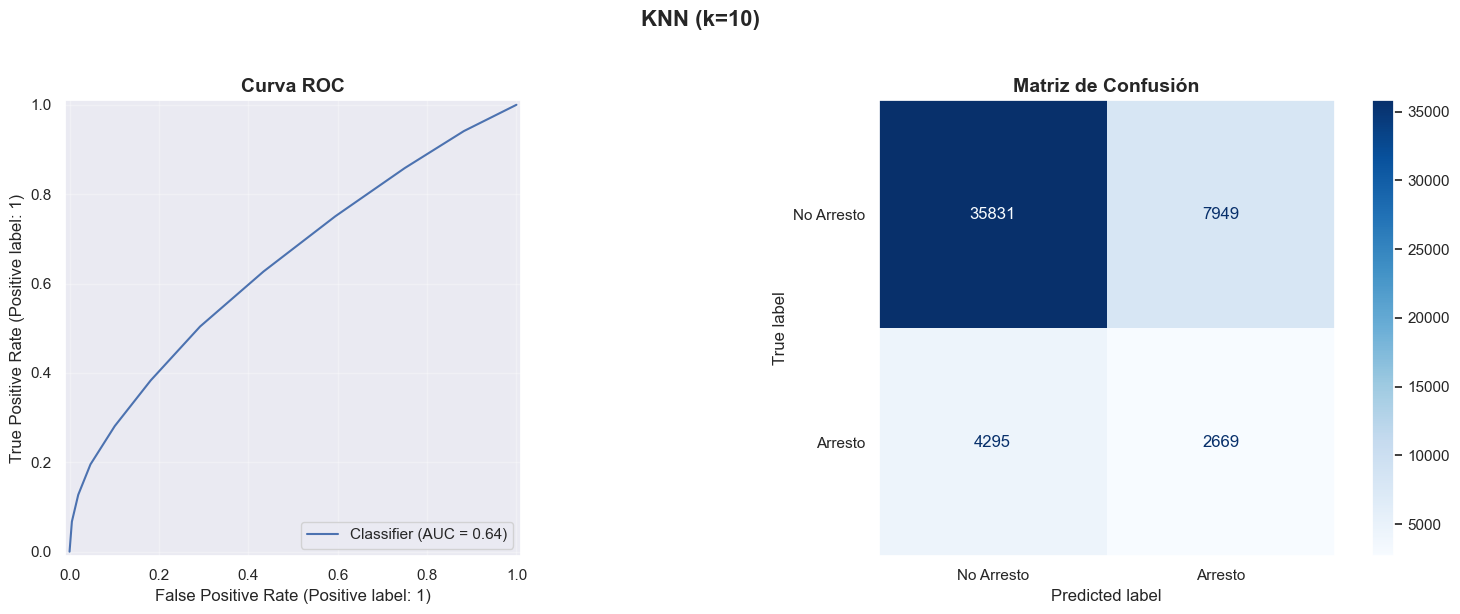

In [92]:
# Obtener probabilidades para ROC curve
pred_knn_proba = model_knn.predict_proba(X_test)[:, 1]

# Gráfica Matriz de Confusión y ROC
cm = plot_evaluation_results(y_test, pred_knn, pred_knn_proba,
                              title="KNN (k=10)",
                              labels=["No Arresto", "Arresto"])

### *Support Vector Machines* (SVM)

In [ ]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_svm = LinearSVC(random_state=seed)
model_svm.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_svm = model_svm.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm))
muestra_metricas("SVM Linear", y_test, pred_svm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.66      0.77     43780
           1       0.23      0.64      0.34      6964

    accuracy                           0.66     50744
   macro avg       0.58      0.65      0.56     50744
weighted avg       0.83      0.66      0.71     50744

#######################################
Accuracy (Exactitud): 65.90%
Recall (Recuperación): 65.90%
Precision (Precisión): 82.61%
F1-Score: 71.11%
MCC (Matthews Correlation Coefficient): 21.49%
Tiempo de entrenamiento: 0.0749 s
Tiempo de predicción: 0.0017 s
Tiempo total: 0.0766 s
#######################################


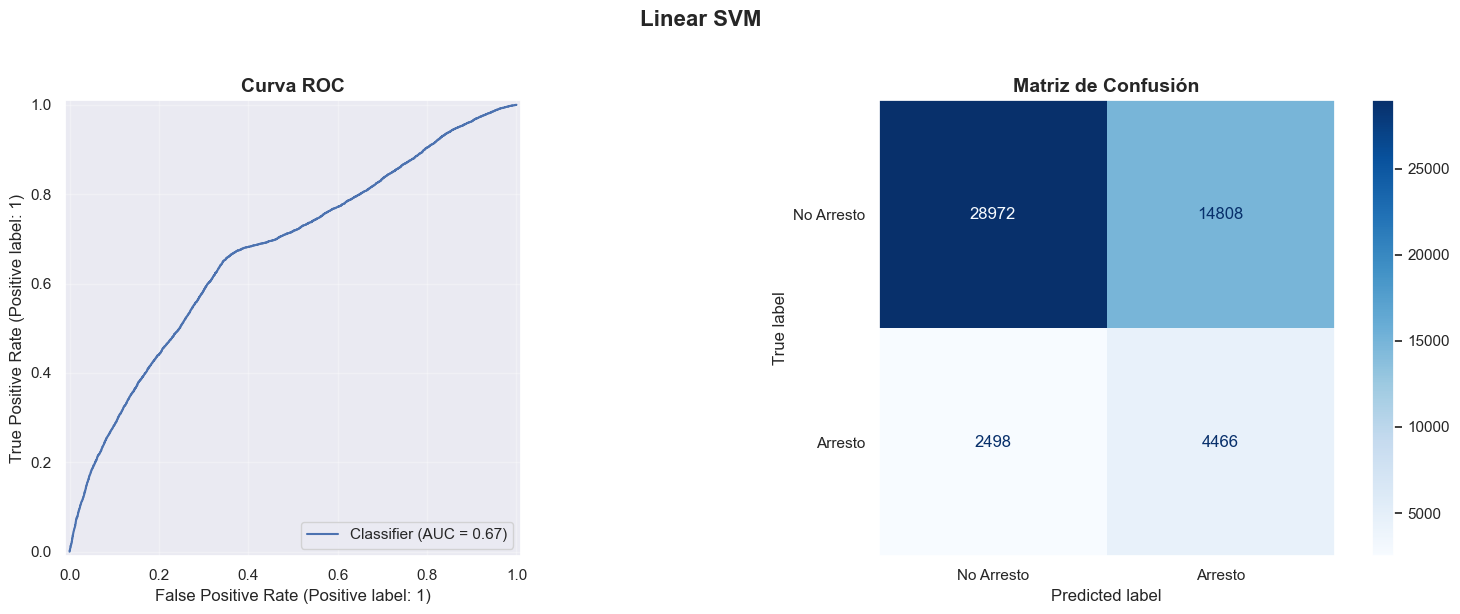

In [94]:
pred_svm_scores = model_svm.decision_function(X_test)

cm = plot_evaluation_results(y_test, pred_svm, pred_svm_scores,
                              title="Linear SVM",
                              labels=["No Arresto", "Arresto"])

In [95]:
metrics_svm = {
    'model_name': 'SVM Linear',
    'Accuracy': float(accuracy_score(y_test, pred_svm)),
    'Precision': float(precision_score(y_test, pred_svm, average='weighted')),
    'Recall': float(recall_score(y_test, pred_svm, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_svm, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_svm_scores)),
    'MCC score': float(matthews_corrcoef(y_test, pred_svm)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('SVM Linear', metrics_svm)

✓ Métricas guardadas en: ./metricas/svm_linear_metrics.json


### Árbol de Decisión


In [ ]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        random_state=seed)
model_tree.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = model_tree.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("Árbol de Decisión", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     43780
           1       0.45      0.57      0.50      6964

    accuracy                           0.84     50744
   macro avg       0.69      0.73      0.70     50744
weighted avg       0.86      0.84      0.85     50744

#######################################
Accuracy (Exactitud): 84.40%
Recall (Recuperación): 84.40%
Precision (Precisión): 86.26%
F1-Score: 85.18%
MCC (Matthews Correlation Coefficient): 41.52%
Tiempo de entrenamiento: 1.0082 s
Tiempo de predicción: 0.0081 s
Tiempo total: 1.0163 s
#######################################


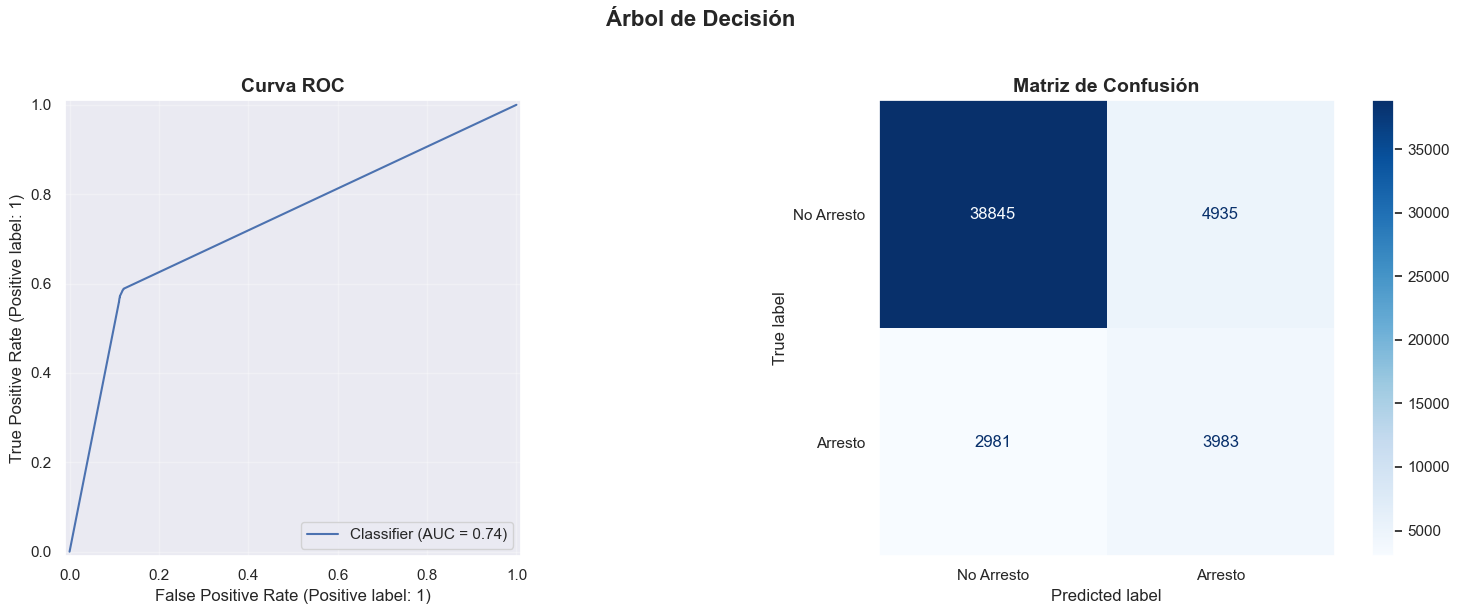

In [97]:
pred_tree_proba = model_tree.predict_proba(X_test)[:, 1]

cm = plot_evaluation_results(y_test, pred_tree, pred_tree_proba,
                              title="Árbol de Decisión",
                              labels=["No Arresto", "Arresto"])

In [99]:
metrics_tree = {
    'model_name': 'Arbol de Decision',
    'Accuracy': float(accuracy_score(y_test, pred_tree)),
    'Precision': float(precision_score(y_test, pred_tree, average='weighted')),
    'Recall': float(recall_score(y_test, pred_tree, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_tree, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_tree_proba)),
    'MCC score': float(matthews_corrcoef(y_test, pred_tree)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('Arbol de Decision', metrics_tree)

✓ Métricas guardadas en: ./metricas/arbol_de_decision_metrics.json


### Random Forest

In [ ]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_forest = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=seed)
model_forest.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_forest = model_forest.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_forest))
muestra_metricas("Random Forest", y_test, pred_forest, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     43780
           1       0.65      0.53      0.58      6964

    accuracy                           0.90     50744
   macro avg       0.79      0.74      0.76     50744
weighted avg       0.89      0.90      0.89     50744

#######################################
Accuracy (Exactitud): 89.60%
Recall (Recuperación): 89.60%
Precision (Precisión): 88.87%
F1-Score: 89.13%
MCC (Matthews Correlation Coefficient): 52.62%
Tiempo de entrenamiento: 4.6771 s
Tiempo de predicción: 0.1393 s
Tiempo total: 4.8164 s
#######################################


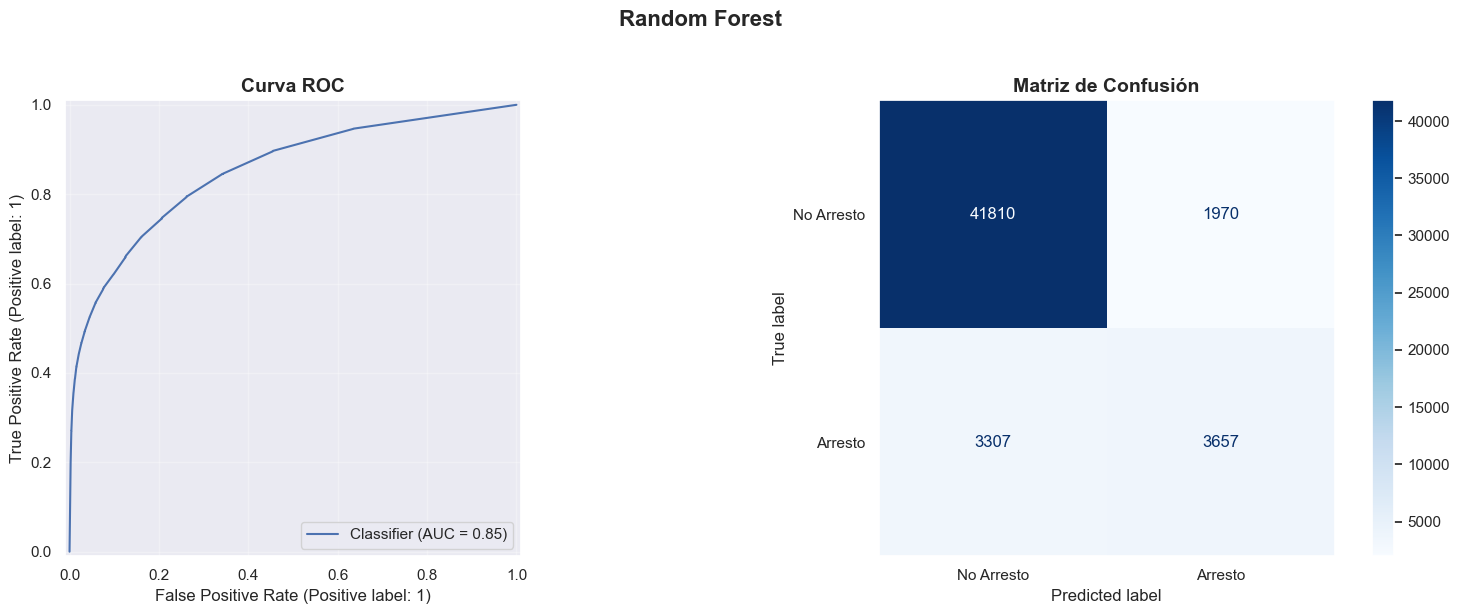

In [101]:
pred_forest_proba = model_forest.predict_proba(X_test)[:, 1]

cm = plot_evaluation_results(y_test, pred_forest, pred_forest_proba,
                              title="Random Forest",
                              labels=["No Arresto", "Arresto"])

In [102]:
metrics_forest = {
    'model_name': 'Random Forest',
    'Accuracy': float(accuracy_score(y_test, pred_forest)),
    'Precision': float(precision_score(y_test, pred_forest, average='weighted')),
    'Recall': float(recall_score(y_test, pred_forest, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_forest, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_forest_proba)),
    'MCC score': float(matthews_corrcoef(y_test, pred_forest)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('Random Forest', metrics_forest)

✓ Métricas guardadas en: ./metricas/random_forest_metrics.json


### Bagging

In [ ]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_bagging = BaggingClassifier(estimator=LogisticRegression(), n_estimators=20,random_state=seed)
model_bagging.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_bagging = model_bagging.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_bagging))
muestra_metricas("Bagging (LR)", y_test, pred_bagging, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.67      0.78     43780
           1       0.23      0.63      0.34      6964

    accuracy                           0.66     50744
   macro avg       0.58      0.65      0.56     50744
weighted avg       0.82      0.66      0.72     50744

#######################################
Accuracy (Exactitud): 66.44%
Recall (Recuperación): 66.44%
Precision (Precisión): 82.46%
F1-Score: 71.53%
MCC (Matthews Correlation Coefficient): 21.22%
Tiempo de entrenamiento: 5.2545 s
Tiempo de predicción: 0.0354 s
Tiempo total: 5.2899 s
#######################################


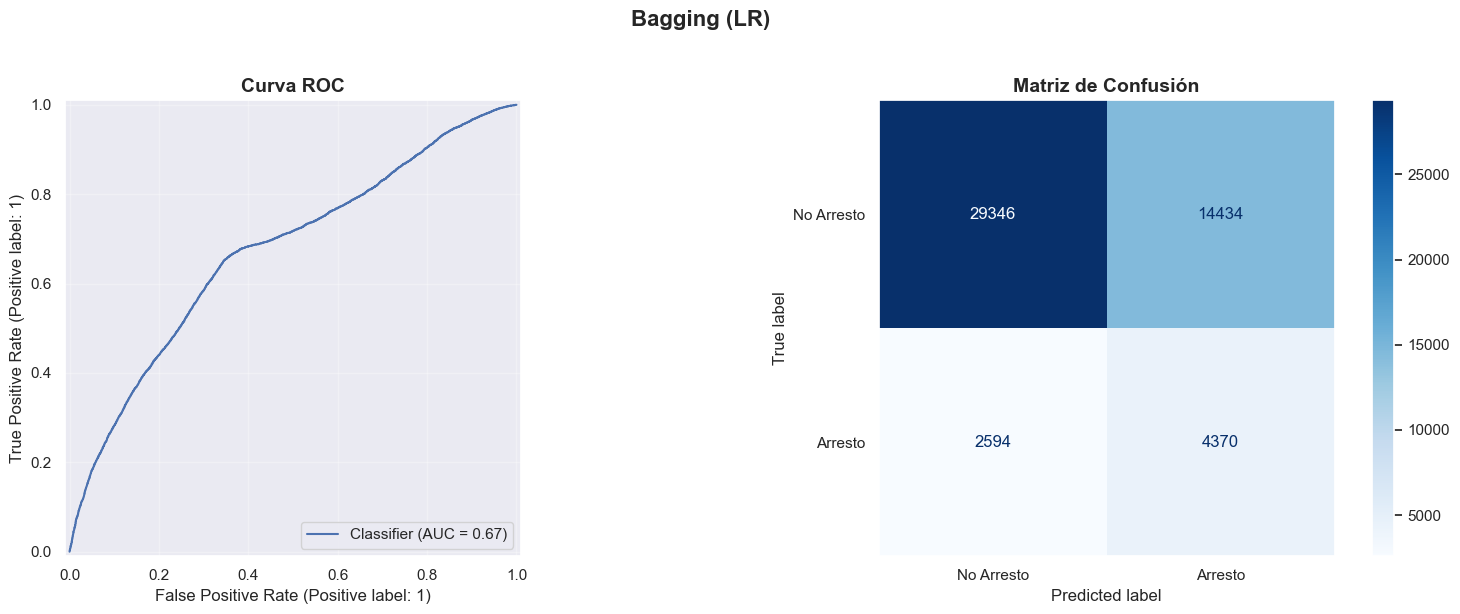

In [104]:
pred_bagging_proba = model_bagging.predict_proba(X_test)[:, 1]

cm = plot_evaluation_results(y_test, pred_bagging, pred_bagging_proba,
                              title="Bagging (LR)",
                              labels=["No Arresto", "Arresto"])

In [106]:
metrics_bagging = {
    'model_name': 'Bagging (LR)',
    'Accuracy': float(accuracy_score(y_test, pred_bagging)),
    'Precision': float(precision_score(y_test, pred_bagging, average='weighted')),
    'Recall': float(recall_score(y_test, pred_bagging, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_bagging, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_bagging_proba)),
    'MCC score': float(matthews_corrcoef(y_test, pred_bagging)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('Bagging (LR)', metrics_bagging)

✓ Métricas guardadas en: ./metricas/bagging_lr_metrics.json


### Clasificador AdaBoost 

In [ ]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=20, random_state=seed)
model_adaboost.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_adaboost = model_adaboost.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_adaboost))
muestra_metricas("AdaBoost", y_test, pred_adaboost, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     43780
           1       0.62      0.50      0.56      6964

    accuracy                           0.89     50744
   macro avg       0.77      0.73      0.75     50744
weighted avg       0.88      0.89      0.89     50744

#######################################
Accuracy (Exactitud): 89.04%
Recall (Recuperación): 89.04%
Precision (Precisión): 88.25%
F1-Score: 88.53%
MCC (Matthews Correlation Coefficient): 49.99%
Tiempo de entrenamiento: 7.3851 s
Tiempo de predicción: 0.0249 s
Tiempo total: 7.4100 s
#######################################


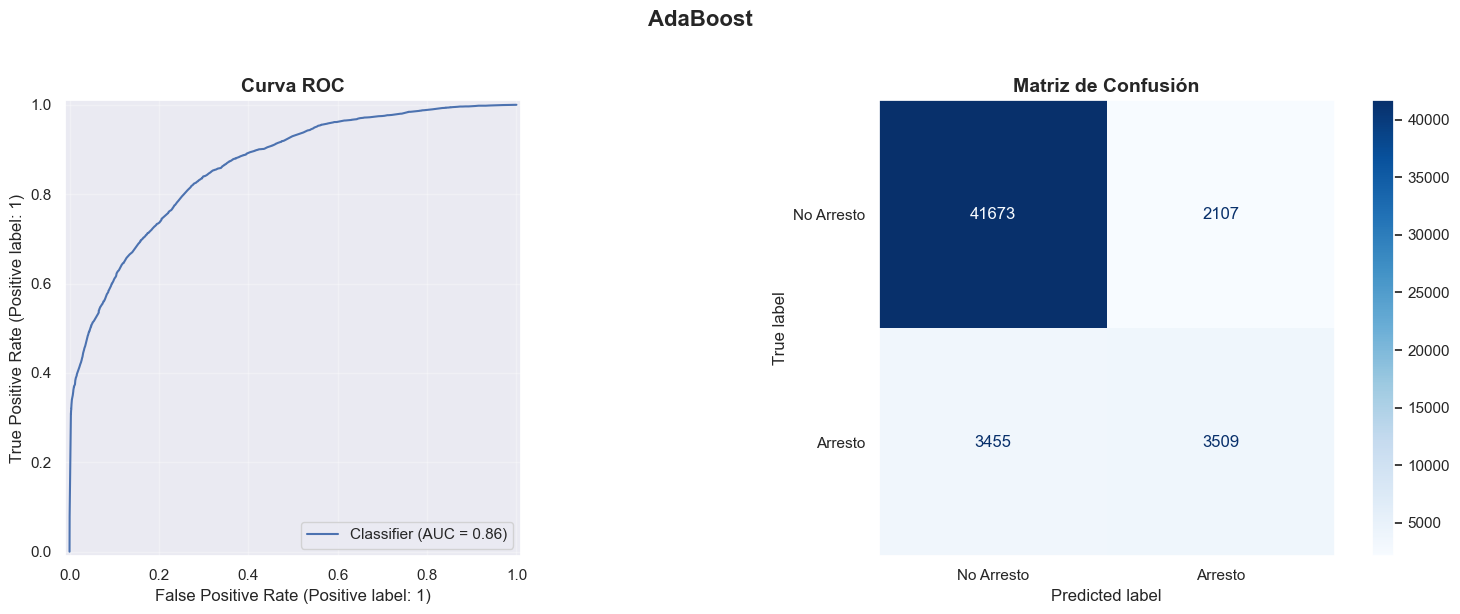

In [107]:
pred_adaboost_proba = model_adaboost.predict_proba(X_test)[:, 1]

cm = plot_evaluation_results(y_test, pred_adaboost, pred_adaboost_proba,
                              title="AdaBoost",
                              labels=["No Arresto", "Arresto"])

In [108]:
metrics_adaboost = {
    'model_name': 'AdaBoost',
    'Accuracy': float(accuracy_score(y_test, pred_adaboost)),
    'Precision': float(precision_score(y_test, pred_adaboost, average='weighted')),
    'Recall': float(recall_score(y_test, pred_adaboost, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_adaboost, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_adaboost_proba)),
    'MCC score': float(matthews_corrcoef(y_test, pred_adaboost)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('AdaBoost', metrics_adaboost)

✓ Métricas guardadas en: ./metricas/adaboost_metrics.json


### XGBoost

In [ ]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_xgb = model_xgb.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_xgb))
muestra_metricas("XGBoost", y_test, pred_xgb, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     43780
           1       0.77      0.51      0.61      6964

    accuracy                           0.91     50744
   macro avg       0.85      0.74      0.78     50744
weighted avg       0.90      0.91      0.90     50744

#######################################
Accuracy (Exactitud): 91.15%
Recall (Recuperación): 91.15%
Precision (Precisión): 90.42%
F1-Score: 90.36%
MCC (Matthews Correlation Coefficient): 57.96%
Tiempo de entrenamiento: 0.2907 s
Tiempo de predicción: 0.0052 s
Tiempo total: 0.2959 s
#######################################


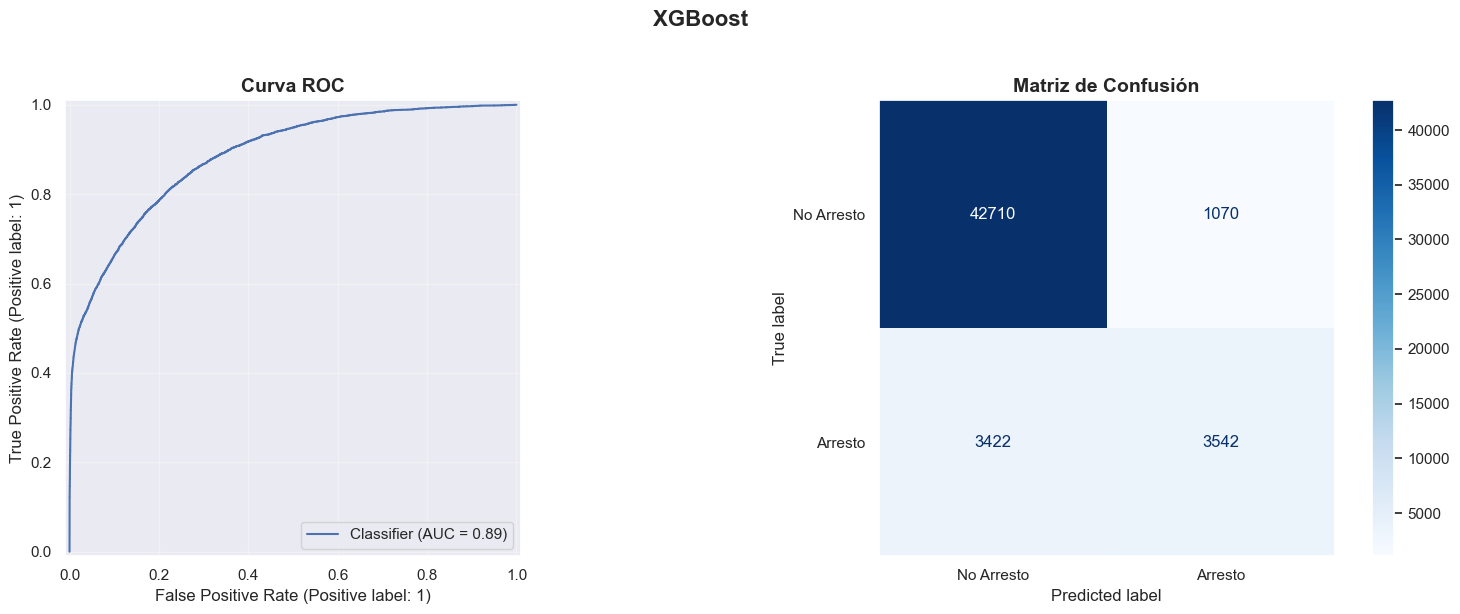

In [109]:
pred_xgb_proba = model_xgb.predict_proba(X_test)[:, 1]

cm = plot_evaluation_results(y_test, pred_xgb, pred_xgb_proba,
                              title="XGBoost",
                              labels=["No Arresto", "Arresto"])

In [110]:
metrics_xgb = {
    'model_name': 'XGBoost',
    'Accuracy': float(accuracy_score(y_test, pred_xgb)),
    'Precision': float(precision_score(y_test, pred_xgb, average='weighted')),
    'Recall': float(recall_score(y_test, pred_xgb, average='weighted')),
    'F1-Score': float(f1_score(y_test, pred_xgb, average='weighted')),
    'AUC': float(roc_auc_score(y_test, pred_xgb_proba)),
    'MCC score': float(matthews_corrcoef(y_test, pred_xgb)),
    'Entrenamiento (s)': float(end_train - start),
    'Predicción (s)': float(end_predict - end_train),
    'Tiempo Total (s)': float(end_predict - start)
}
save_model_metrics('XGBoost', metrics_xgb)

✓ Métricas guardadas en: ./metricas/xgboost_metrics.json
